<a href="https://colab.research.google.com/github/brytlao/Practical_computer_vision/blob/master/CHAPTER_08_3D_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 06: 3D Computer Vision**

Discussion of computer vision through geometrical perspective.

# **Datasets and libraries required**

In [1]:
# import dependencies
import numpy as np
import matplotlib.pyplot as plt
import cv2
print(cv2.__version__)
import glob

# plots figures inside notebook
%matplotlib inline

# plotting parameters
FIG_WIDTH = 3
FIG_HEIGHT = 2
NUM_ROW = 1

3.4.3


In [0]:
# plotting function:
def plot_cv_img(ax,input_image,img_title):
    """
    Convert an image from BGR to RGB then plot
    """
    # change color channel
    ax.imshow(cv2.cvtColor(input_image,cv2.COLOR_BGR2RGB))
      
    # turn off axes
    ax.axis('off')

    # set title
    ax.set_title(img_title)

In [3]:
# upload file using explorer
from google.colab import files
uploaded = files.upload()
for k, v in uploaded.items():
  open(k, 'wb').write(v)
img_name1 = list(uploaded)[0]

# read an image from file
img1 = cv2.imread(img_name1)

Saving bridge_close.jpg to bridge_close.jpg


In [4]:
# upload file using explorer
from google.colab import files
uploaded = files.upload()
for k, v in uploaded.items():
  open(k, 'wb').write(v)
img_name2 = list(uploaded)[0]

# read an image from file
img2 = cv2.imread(img_name2)

Saving bridge_far.jpg to bridge_far.jpg


# **Applications**

*   drones
*   image editing applications
*   satellites or space vehicles
*   augmented reality

#**Aligning images**

In [0]:
# function to compute ORB keypoints
def compute_orb_keypoints(filename):
    """
    read image from filename and compute ORB keypoints
    returns image, keypoints, and descriptors
    """
    # load image
    img = cv2.imread(filename)
    
    # create orb object
    orb = cv2.ORB_create()
    
    # set method for extracting ORB points
    orb.setScoreType(cv2.FAST_FEATURE_DETECTOR_TYPE_9_16)
    orb.setWTA_K(3)
    
    # detect keypoints
    kp = orb.detect(img,None)
    
    # compute descriptors
    kp,des = orb.compute(img,kp)
    
    return img,kp,des
    

In [0]:
# function for brute force matcher
def brute_force_matcher(des1,des2):
  """
  brute force matcher for ORB feature descriptors
  returns matches
  """
  # create BFMatcher object
  bf = cv2.BFMatcher(cv2.NORM_HAMMING2,crossCheck=True)
  
  # match descriptors
  matches = bf.match(des1,des2)
  
  # sort in order of distance
  matches = sorted(matches,key=lambda x:x.distance)
  
  return matches

In [0]:
# function to compute fundamental matrix
def compute_fundamental_matrix(filename1,filename2):
  """
  take in filenames of two input images
  return fundamental matrix
  compute using 8-point algorithm
  """
  # compute ORB keypoints and descriptor for each image
  img1,kp1,des1 = compute_orb_keypoints(filename1)
  img2,kp2,des2 = compute_orb_keypoints(filename2)
  
  # compute keypoint matches using descriptor
  matches = brute_force_matcher(des1,des2)
  
  # extract points
  pts1 = []
  pts2 = []
  for i,(m) in enumerate(matches):
      if m.distance<20:
        pts1.append(kp1[m.queryIdx].pt)
        pts2.append(kp2[m.trainIdx].pt)
  pts1 = np.asarray(pts1)
  pts2 = np.asarray(pts2)
  
  # compute fundamental matrix
  F,mask = cv2.findFundamentalMat(pts1,pts2,cv2.FM_8POINT)
  
  return F

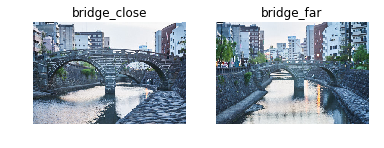

In [8]:
# display images
# set figure params
num_fig = 2
plt.figure(figsize=(FIG_WIDTH*num_fig,FIG_HEIGHT))

# plot original image
ax = plt.subplot(1,num_fig,1)
plot_cv_img(ax,img1,'bridge_close')

# plot harris corner
ax = plt.subplot(1,num_fig,2)
plot_cv_img(ax,img2,'bridge_far')

In [9]:
# compute fundamental matrix
print(compute_fundamental_matrix(img_name1,img_name2))

[[ 3.41517996e-06  2.69593823e-06 -1.10355179e-03]
 [ 1.44103079e-05  2.84137592e-05 -5.98337485e-03]
 [-2.44664925e-03 -4.62025101e-03  1.00000000e+00]]


# **Other topics**

*   image formation
*   visual odometry
*   visual SLAM (nice demo: https://sites.google.com/a/korea.ac.kr/intelligent-robot-laboratory/research/navigation/visual-slam)